# 1. 准备数据集

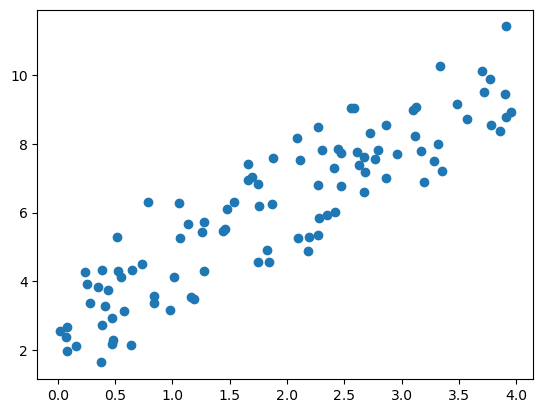

In [45]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
# 生成100个带噪音的点
w, b = 1.8, 2.5
x1 = np.random.rand(100) * 4
noise = np.random.randn(100)
x2 = w * x1 + b + noise
# 将x1和x2堆叠成一个二维数组
x = np.vstack([x1, x2]).T
plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [46]:
np.mean(x, axis = 0)

array([1.89117536, 6.09644999])

# 2. 零均值归一化

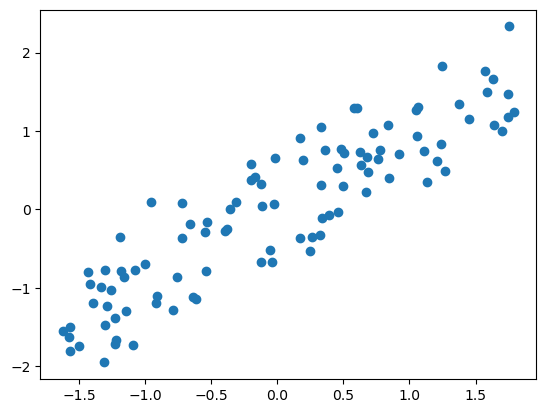

In [47]:
# 使用sklean方法对x进行零均值归一化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
plt.scatter(x[:, 0], x[:, 1])
plt.show()
# 可以看到数据的均值已经变为0,方差为1

In [48]:
np.mean(x, axis = 0)
# 这是因为计算机浮点数计算误差,实际数据的均值约等于0(10-16次方,很接近了)

array([-1.22124533e-16,  6.63913369e-16])

# 3. PCA

In [49]:
from sklearn.decomposition import PCA

In [50]:
# n_components(保留的主成分数量,就是坐标轴数量)=1表示将数据降到一维
pca = PCA(n_components=1)
pca.fit(x)

PCA(n_components=1)

In [51]:
# pca.components_ : 主成分(即特征向量,转换后的投影坐标轴方向)
# 形状为[n_components, n_features]的数组, 这里是[1,2]
# 每一行表示一个主成分,因为n_components=1,所以只有一行
# 主成分是在标准化后的数据上计算的,表示数据的主要变化方向
# 这里返回的是第一主成分的方向向量[0.70710678 0.70710678]
# 代表在x和y方向上的投影系数都接近0.707
# 表明数据的主要变化方向约45度
pca.components_ 

array([[0.70710678, 0.70710678]])

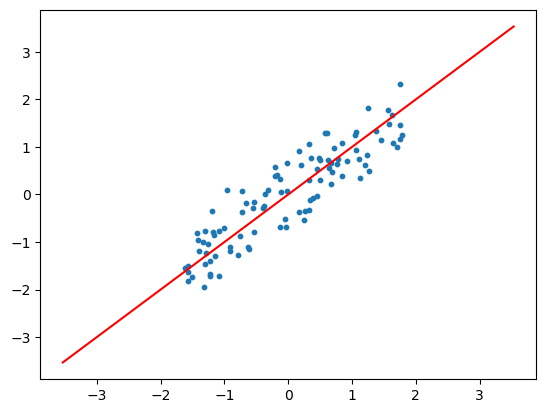

In [52]:
plt.scatter(x[:, 0], x[:, 1], s = 10)
plt.plot(
    np.array([pca.components_[0][0] * -1, pca.components_[0][0]]) * 5,
    np.array([pca.components_[0][1] * -1, pca.components_[0][1]]) * 5,
    c = 'r'
)
plt.show()

In [53]:
# 使用fit好的PCA模型对标准化后的数据进行转换
# x_pca的形状将是[n_samples, n_components] = [100,1]
# 即将每个二维样本点投影到主成分方向上,得到一维坐标
# 这一维坐标代表了样本在第一主成分方向上的投影值
x_pca = pca.transform(x)

In [54]:
x_pca.shape

(100, 1)

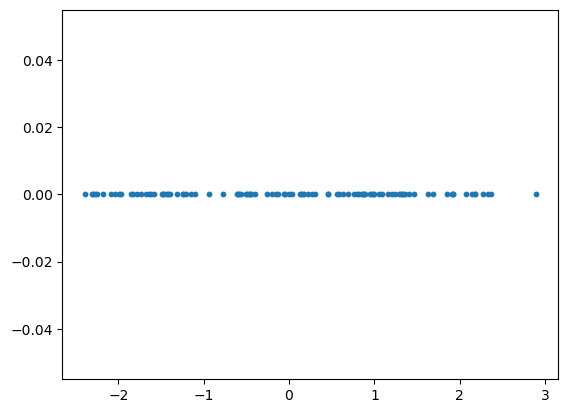

In [55]:
plt.scatter(x_pca, np.zeros_like(x_pca), s = 10)
plt.show()
# 这就是找到主成分后,将二维数据投影到一维主成分方向后的结果

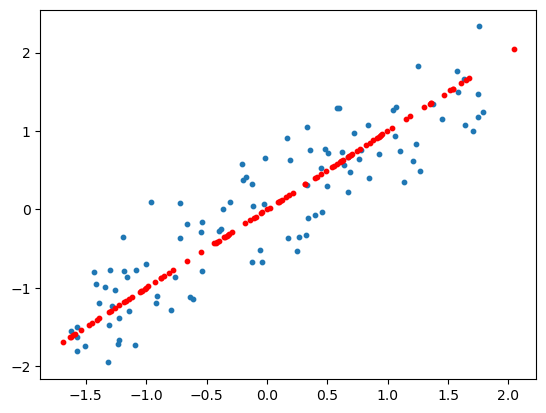

In [ ]:
# 使用inverse_transform将降维后的数据转换回原始空间
# x_pca是降维后的一维数据，形状为[100,1]
# inverse_transform会将数据投影回原始二维空间，得到重构数据
# 重构数据的形状为[100,2]，每个样本点有两个坐标
# 由于PCA是线性变换，重构的点会落在主成分方向上
# 这些重构的点代表了原始数据在主成分方向上的投影
x_pca_inv = pca.inverse_transform(x_pca)
plt.scatter(x[:, 0], x[:, 1], s = 10)
plt.scatter(x_pca_inv[:, 0], x_pca_inv[:, 1], s = 10, c = 'r')
plt.show()
#一句话说:红点就是将降维后的数据投影回原始空间